# Read Data

In [1]:
# set up logging
import logging
import logging.config

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
!gdown 1-F7f9oSjFx0Si44DvdkzFhjjwfro_Y1p

Downloading...
From: https://drive.google.com/uc?id=1-F7f9oSjFx0Si44DvdkzFhjjwfro_Y1p
To: /content/train_data.csv
100% 635M/635M [00:06<00:00, 96.3MB/s]


In [3]:
# Load data
train = pd.read_csv('train_data.csv')
print("Data loaded")

Data loaded


In [4]:
train.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [5]:
train.describe()

,overall,unixReviewTime
count,838944.000000,8.389440e+05
mean,4.021317,1.483167e+09
std,1.344223,2.229270e+07
min,1.000000,1.451606e+09
25%,3.000000,1.464653e+09
50%,5.000000,1.479254e+09
75%,5.000000,1.499472e+09
max,5.000000,1.538525e+09


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [7]:
print(train.isnull().sum()/len(train)*100)

overall            0.000000
vote              77.177499
verified           0.000000
reviewTime         0.000000
reviewerID         0.000000
asin               0.000000
style             41.520173
reviewerName       0.027058
reviewText         0.000000
summary            0.009059
unixReviewTime     0.000000
dtype: float64


# Preprocessing

### 1. Converting the review text into a long string:

first of all, concatenates all the review texts from the train dataset into a single string called raw_corpus.

In [8]:
# Convert all the review text into a long string and print its length
raw_corpus = u''.join(train['reviewText']+" ")
print("Raw Corpus contains {0:,} characters".format(len(raw_corpus)))

Raw Corpus contains 524,916,677 characters


### 2. Downloading and loading the punkt tokenizer:

now, uses the Natural Language Toolkit (NLTK) to download the punkt tokenizer, which is a pre-trained tokenizer for English.

In [10]:
# import natural language toolkit
import nltk

# download the punkt tokenizer
nltk.download('punkt')
print("The punkt tokenizer is downloaded")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahdi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


The punkt tokenizer is downloaded


### 3. Tokenizing the raw corpus into sentences:

after that loads the tokenizer, now it's time to tokenizes the raw corpus into sentences using the loaded punkt tokenizer. The resulting sentences are stored in the raw_sentences list, and the code prints the number of raw sentences.

In [11]:
# Load the punkt tokenizer
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("The punkt tokenizer is loaded")

# we tokenize the raw string into raw sentences
raw_sentences = tokenizer.tokenize(raw_corpus)
print("We have {0:,} raw sentences".format(len(raw_sentences)))

The punkt tokenizer is loaded
We have 6,074,937 raw sentences


### 4. Cleaning and splitting sentences into words:

This code defines a function called clean_and_split_str that removes special characters from a string and splits it into a list of words. It then applies this function to each raw sentence in raw_sentences and builds a list of cleaned sentences called sentences. The code prints the number of clean sentences.

In [12]:
import re

# Clean and split sentence into words
def clean_and_split_str(string):
    strip_special_chars = re.compile("[^A-Za-z]+")
    string = re.sub(strip_special_chars, " ", string)
    return string.strip().split()

In [13]:
# clean each raw sentences and build the list of sentences
sentences = []
for raw_sent in raw_sentences:
    if len(raw_sent) > 0:
        sentences.append(clean_and_split_str(raw_sent))
print("We have {0:,} clean sentences".format(len(sentences)))

We have 6,074,937 clean sentences


In [14]:
print(raw_sentences[1])
print()
print(sentences[1])

The old remote could go head to head and learn.

['The', 'old', 'remote', 'could', 'go', 'head', 'to', 'head', 'and', 'learn']


### 5. Counting the number of tokens:

 This code calculates the total number of tokens in the dataset corpus by summing the lengths of all sentences in sentences. It then prints the token count.

In [15]:
token_count = sum([len(sentence) for sentence in sentences])
print("The dataset corpus contains {0:,} tokens".format(token_count))

The dataset corpus contains 98,273,268 tokens


# Word2Vec

### 6. Setting Word2Vec parameters:

This code sets various parameters for the Word2Vec model, such as the dimensionality of word vectors (num_features), minimum word count threshold (min_word_count), number of parallel workers (num_workers), context window length (context_size), and the seed for reproducibility (seed).

In [16]:
import gensim
from gensim.models import Word2Vec, callbacks

In [17]:
import multiprocessing

#Dimensionality of the resulting word vectors
num_features = 300

#Minimum word count threshold
min_word_count = 2

#Number of threads to run in parallel
num_workers = multiprocessing.cpu_count()

#Context window length
context_size = 10

#Seed for the RNG, to make the result reproducible
seed = 1

In [18]:
# Define a callback to print progress
class callback(callbacks.CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        print(f"Epoch: {self.epoch}")
        self.epoch += 1

In [19]:
model = Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    vector_size=num_features,
    min_count=min_word_count,
    window=context_size,
    callbacks=[callback()])

2023-11-12 21:06:12,725 : WARNING : Callbacks are no longer retained by the model, so must be provided whenever training is triggered, as in initialization with a corpus or calling `train()`. The callbacks provided in this initialization without triggering train will be ignored.
2023-11-12 21:06:12,725 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.025>', 'datetime': '2023-11-12T21:06:12.725408', 'gensim': '4.3.2', 'python': '3.9.13 (main, Oct 13 2022, 21:23:06) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}


### 7. Building the vocabulary:

 This code initializes a Word2Vec model with the specified parameters and builds the vocabulary based on the sentences list.

In [20]:
model.build_vocab(sentences)
print("The vocabulary is built")
print("Word2Vec vocabulary length: ", len(model.wv))

2023-11-12 21:06:21,182 : INFO : collecting all words and their counts
2023-11-12 21:06:21,183 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-12 21:06:21,225 : INFO : PROGRESS: at sentence #10000, processed 159472 words, keeping 10654 word types
2023-11-12 21:06:21,280 : INFO : PROGRESS: at sentence #20000, processed 319491 words, keeping 14811 word types
2023-11-12 21:06:21,327 : INFO : PROGRESS: at sentence #30000, processed 480487 words, keeping 17692 word types
2023-11-12 21:06:21,372 : INFO : PROGRESS: at sentence #40000, processed 641945 words, keeping 20295 word types
2023-11-12 21:06:21,422 : INFO : PROGRESS: at sentence #50000, processed 804554 words, keeping 22593 word types
2023-11-12 21:06:21,468 : INFO : PROGRESS: at sentence #60000, processed 967942 words, keeping 24800 word types
2023-11-12 21:06:21,513 : INFO : PROGRESS: at sentence #70000, processed 1128181 words, keeping 26747 word types
2023-11-12 21:06:21,551 : INFO : PROGRESS: at

The vocabulary is built
Word2Vec vocabulary length:  123874


### 8. Training the Word2Vec model:

 This code trains the Word2Vec model on the sentences data for a specified number of epochs.

In [21]:
#for epoch in tqdm(range(2), unit='epoch', desc='Training'):
#Start training the model
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)
print("Training finished")

2023-11-12 21:06:58,627 : INFO : Word2Vec lifecycle event {'msg': 'training model with 4 workers on 123874 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=10 shrink_windows=True', 'datetime': '2023-11-12T21:06:58.627022', 'gensim': '4.3.2', 'python': '3.9.13 (main, Oct 13 2022, 21:23:06) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'train'}
2023-11-12 21:06:59,785 : INFO : EPOCH 0 - PROGRESS: at 0.19% examples, 137035 words/s, in_qsize 7, out_qsize 0
2023-11-12 21:07:00,803 : INFO : EPOCH 0 - PROGRESS: at 0.41% examples, 151607 words/s, in_qsize 7, out_qsize 0
2023-11-12 21:07:01,841 : INFO : EPOCH 0 - PROGRESS: at 0.70% examples, 169652 words/s, in_qsize 7, out_qsize 0
2023-11-12 21:07:02,850 : INFO : EPOCH 0 - PROGRESS: at 0.98% examples, 179497 words/s, in_qsize 7, out_qsize 0
2023-11-12 21:07:03,931 : INFO : EPOCH 0 - PROGRESS: at 1.26% examples, 183518 words/s, in_qsize 7, out_qsize 0
2023-11-12 21:07:04,967 : INFO : E

Training finished


In [22]:
#Save the model
model.save("model_trained.w2v")
print("Model saved")

2023-11-12 21:41:12,078 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'model_trained.w2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-11-12T21:41:12.078113', 'gensim': '4.3.2', 'python': '3.9.13 (main, Oct 13 2022, 21:23:06) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'saving'}
2023-11-12 21:41:12,110 : INFO : storing np array 'vectors' to model_trained.w2v.wv.vectors.npy
2023-11-12 21:41:12,578 : INFO : storing np array 'syn1neg' to model_trained.w2v.syn1neg.npy
2023-11-12 21:41:13,015 : INFO : not storing attribute cum_table
2023-11-12 21:41:13,278 : INFO : saved model_trained.w2v


Model saved


In [ ]:
#model = Word2Vec.load("model_trained.w2v")

### 9. Accessing word vectors:

 This code demonstrates how to access word vectors for specific words like "guarantee" and "warranty" using the trained Word2Vec model.

In [23]:
model.wv['guarantee']

array([-1.53414249e-01,  4.19506967e-01,  1.76058352e-01, -1.11264758e-01,
        1.58030555e-01,  2.97884457e-02, -2.62792587e-01,  2.21241564e-02,
       -3.18832844e-01, -3.68421227e-01, -4.19086874e-01, -2.34835193e-01,
        8.68256465e-02,  2.07795680e-01,  2.55732834e-01, -7.38869384e-02,
        1.90506935e-01, -2.04577565e-01, -1.39019012e-01, -4.87998724e-02,
       -1.10294968e-01, -2.11845562e-02, -2.75293905e-02, -6.75658956e-02,
        2.86072016e-01,  3.43632177e-02, -4.37486380e-01,  2.71379143e-01,
        3.18675756e-01, -1.08407333e-01, -2.97045894e-02, -4.88625839e-03,
        6.55854866e-02, -1.00922845e-01, -1.81268565e-02, -3.88663076e-02,
        9.49431583e-02, -7.34842289e-03, -1.08183973e-01,  2.35960588e-01,
       -2.19671190e-01,  1.73433349e-01,  9.40001905e-02,  2.69582659e-01,
       -3.54881026e-02, -2.39003807e-01, -2.33172536e-01,  1.01244412e-02,
       -8.80889967e-02, -3.50506939e-02, -9.71215665e-02,  2.02204615e-01,
       -7.55444616e-02, -

In [24]:
model.wv['warranty']

array([-2.43863285e-01,  3.90536278e-01,  2.05053478e-01, -2.59570420e-01,
        2.26762921e-01,  2.42434174e-01, -3.31336468e-01, -1.85051691e-02,
       -3.39076549e-01, -1.10144101e-01, -3.68770003e-01, -3.73300731e-01,
        1.38469711e-01, -1.38146818e-01, -1.70423120e-01, -6.68672845e-02,
        3.63010287e-01, -1.81733266e-01, -2.57493630e-02, -2.81184167e-01,
       -2.45498903e-02, -9.41395238e-02, -7.35721812e-02,  1.29189625e-01,
       -2.09715795e-02,  1.47011802e-01, -3.36651765e-02,  3.80130112e-01,
        1.24402553e-01,  1.77670270e-01, -4.01985161e-02,  1.91114604e-01,
        5.32890379e-01, -1.01854570e-01, -2.00342342e-01, -1.89670622e-01,
        1.35272369e-01, -3.29877764e-01,  1.40535727e-01,  3.70479822e-01,
       -2.37154096e-01,  4.68924642e-01,  9.17502791e-02, -8.86714309e-02,
        4.13684666e-01,  2.02460177e-02, -6.09868944e-01,  6.56678677e-02,
       -2.95368910e-01, -5.48084676e-01, -2.67015900e-02,  1.34264991e-01,
       -3.46585751e-01,  

In [25]:
def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # ax = fig.add_axes([1, 1, 1, 1])
    ax = plt.gca()

    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)

    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)

    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

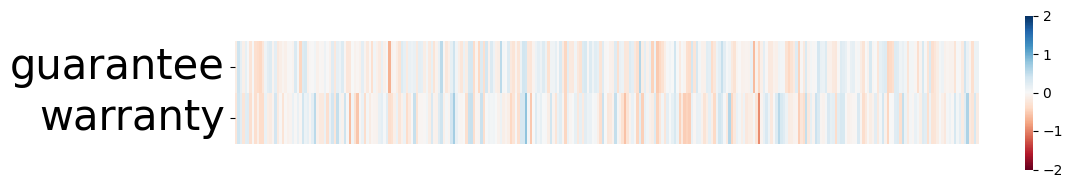

In [26]:
plot_embeddings([model.wv['guarantee'], model.wv['warranty']],
                ['guarantee', 'warranty'])

# Most similar words

### 10. Finding similar words:

 This code finds the most similar words to "guarantee" and "warranty" based on the trained Word2Vec model.

In [27]:
model.wv.most_similar("guarantee", topn=10) # get other similar words

[('warranty', 0.5782433152198792),
 ('guaranteed', 0.5713793635368347),
 ('guaranty', 0.5704437494277954),
 ('guarentee', 0.5666738152503967),
 ('warrenty', 0.5569469332695007),
 ('commitments', 0.5450445413589478),
 ('lifetime', 0.5430026650428772),
 ('honor', 0.5382528901100159),
 ('honour', 0.5322678685188293),
 ('Allstate', 0.5281895399093628)]

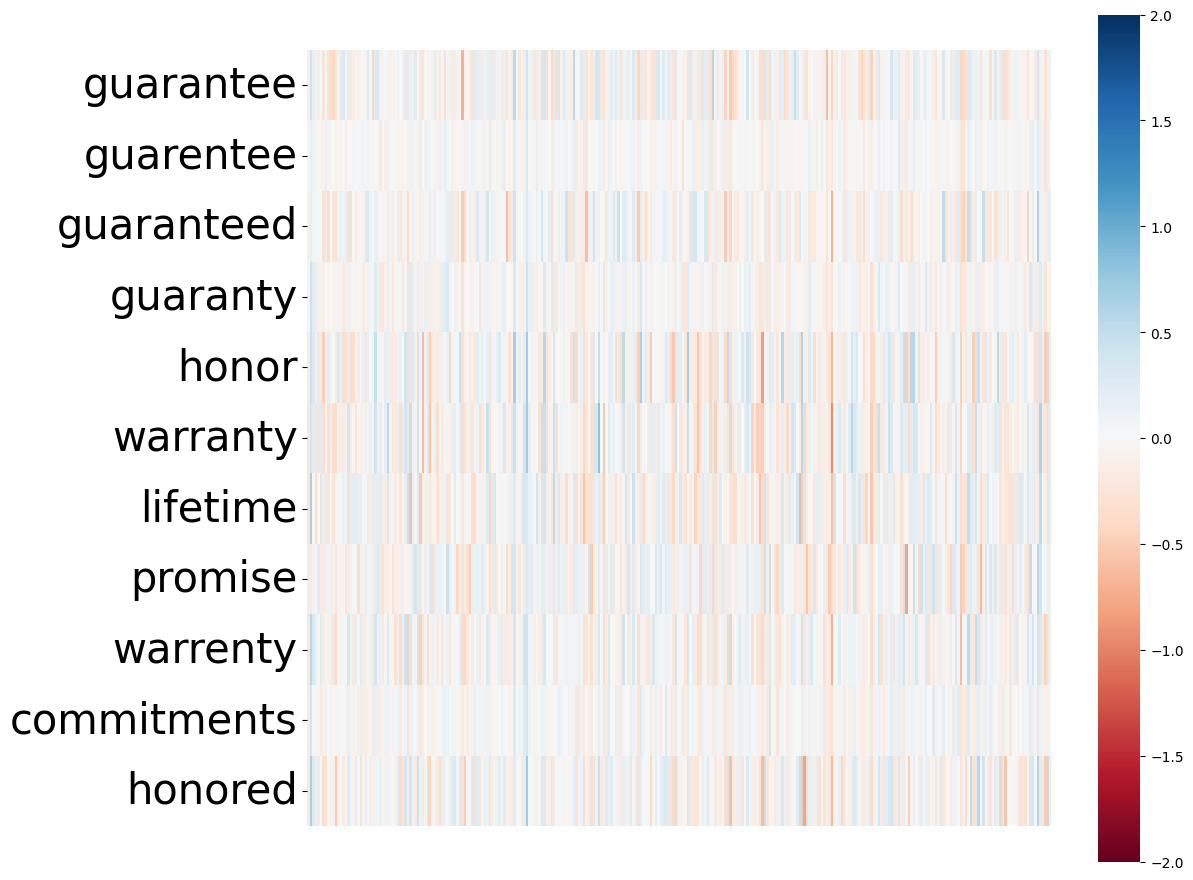

In [28]:
plot_embeddings([model.wv['guarantee'], model.wv['guarentee'], model.wv['guaranteed'], model.wv['guaranty'], model.wv['honor'], model.wv['warranty'], model.wv['lifetime'], model.wv['promise'], model.wv['warrenty'], model.wv['commitments'], model.wv['honored']],
                ['guarantee','guarentee','guaranteed','guaranty','honor','warranty','lifetime','promise','warrenty','commitments','honored'])

In [29]:
model.wv.most_similar('warranty', topn=10) # get other similar words

[('warrantee', 0.7919111251831055),
 ('warrenty', 0.774027407169342),
 ('warranties', 0.7160447239875793),
 ('honor', 0.6981348395347595),
 ('honored', 0.6609714031219482),
 ('expired', 0.6461772322654724),
 ('warantee', 0.6405708193778992),
 ('honoring', 0.6375042200088501),
 ('SquareTrade', 0.6374340057373047),
 ('lifetime', 0.6315988898277283)]

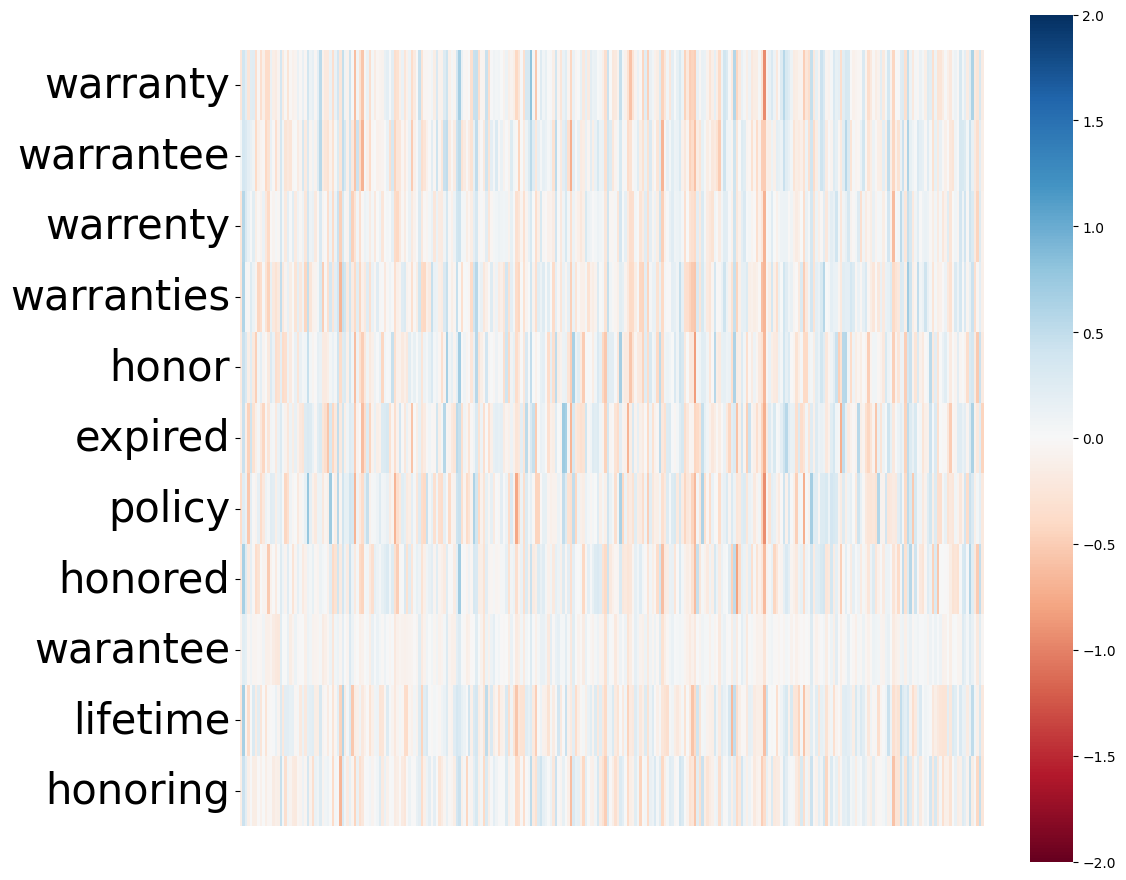

In [30]:
plot_embeddings([model.wv['warranty'], model.wv['warrantee'], model.wv['warrenty'], model.wv['warranties'], model.wv['honor'], model.wv['expired'], model.wv['policy'], model.wv['honored'], model.wv['warantee'], model.wv['lifetime'], model.wv['honoring']],
                ['warranty','warrantee','warrenty','warranties','honor','expired','policy','honored','warantee','lifetime','honoring'])

### 11. Expanding the list of keywords:

This code combines the original keywords with the similar words and removes duplicates to obtain an expanded list of keywords.

In [31]:
keywords = ['guarantee', 'warranty']

similar_words = []
for keyword in tqdm(keywords, total=len(keywords)):
     similar_words += [word for word in model.wv.most_similar(keyword)]
     # Combine the keywords and similar words
keywords += similar_words
#keywords = list(set(keywords))
keywords

100%|██████████| 2/2 [00:00<00:00, 83.31it/s]


['guarantee',
 'warranty',
 ('warranty', 0.5782433152198792),
 ('guaranteed', 0.5713793635368347),
 ('guaranty', 0.5704437494277954),
 ('guarentee', 0.5666738152503967),
 ('warrenty', 0.5569469332695007),
 ('commitments', 0.5450445413589478),
 ('lifetime', 0.5430026650428772),
 ('honor', 0.5382528901100159),
 ('honour', 0.5322678685188293),
 ('Allstate', 0.5281895399093628),
 ('warrantee', 0.7919111251831055),
 ('warrenty', 0.774027407169342),
 ('warranties', 0.7160447239875793),
 ('honor', 0.6981348395347595),
 ('honored', 0.6609714031219482),
 ('expired', 0.6461772322654724),
 ('warantee', 0.6405708193778992),
 ('honoring', 0.6375042200088501),
 ('SquareTrade', 0.6374340057373047),
 ('lifetime', 0.6315988898277283)]

In [32]:
elements = []
for item in keywords:
  if isinstance(item, tuple):
        elements.append(item[0])
  else:
        elements.append(item)
print(elements)

['guarantee', 'warranty', 'warranty', 'guaranteed', 'guaranty', 'guarentee', 'warrenty', 'commitments', 'lifetime', 'honor', 'honour', 'Allstate', 'warrantee', 'warrenty', 'warranties', 'honor', 'honored', 'expired', 'warantee', 'honoring', 'SquareTrade', 'lifetime']


### 12. Filtering reviews based on keywords:

 This code filters the reviews in the train['reviewText'] dataset, keeping only the ones that contain at least one of the keywords or similar words. The filtered reviews are stored in the filtered_reviews list.

In [33]:
# Filtering comments that have at least one of keywords or similar_words
filtered_reviews = []
for review in train['reviewText']:
    for element in elements:
        if element in review:
            filtered_reviews.append(review)
            break

In [ ]:
# # Define a function to extract the reviews related to warranty
# def extract_warranty_reviews(text):
#   if not isinstance(text, str):
#     return False

#   for element in elements:
#     if re.search(element, text, re.IGNORECASE):
#       return True

#   return False

# # Apply the function to the reviewText column
# train['warranty_related'] = train['reviewText'].apply(extract_warranty_reviews)

# # Filter the dataset to include only the warranty-related reviews
# warranty_df = train[train['warranty_related'] == True]

# # Calculate the average rating for each product
# product_ratings = warranty_df.groupby('asin')['overall'].mean()

# # Print the results
# print(product_ratings)

In [34]:
# Get the product ASIN for each review
product_asins = []
for review in filtered_reviews:
  product_asins.append(train.loc[train['reviewText'] == review, 'asin'].values[0])

In [35]:
# Get the overall rating for each review
overall_ratings = []
for review in tqdm(filtered_reviews):
  overall_ratings.append(train.loc[train['reviewText'] == review, 'overall'].values[0])

100%|██████████| 19338/19338 [39:21<00:00,  8.19it/s] 


In [37]:
# Calculate the average rating for each product
average_ratings = {}
for product_asin in tqdm(set(product_asins)):
  ratings = [overall_rating for overall_rating, product_asin2 in zip(overall_ratings, product_asins) if product_asin2 == product_asin]
  if len(ratings) > 0:
    average_ratings[product_asin] = sum(ratings) / len(ratings)

100%|██████████| 10276/10276 [00:20<00:00, 506.76it/s]


In [38]:
# Print the average ratings
for product_asin, average_rating in average_ratings.items():
  print(f"Product ASIN: {product_asin}, Average rating: {average_rating}")

Product ASIN: B0000E1VRT, Average rating: 5.0
Product ASIN: B00TQ54CZO, Average rating: 5.0
Product ASIN: B00ZK3S5HC, Average rating: 5.0
Product ASIN: B00ILCS164, Average rating: 1.0
Product ASIN: B006EB6L0M, Average rating: 2.0
Product ASIN: B00LKAD9SO, Average rating: 3.0
Product ASIN: B00698WMYO, Average rating: 1.0
Product ASIN: B01F57BNG2, Average rating: 3.2857142857142856
Product ASIN: B0124RQ9Z6, Average rating: 3.0
Product ASIN: B012PEINAW, Average rating: 1.0
Product ASIN: B01FJ1YGJK, Average rating: 4.333333333333333
Product ASIN: B00M8ABFX6, Average rating: 2.8333333333333335
Product ASIN: B0012Z3MKW, Average rating: 1.0
Product ASIN: B01FTX7M26, Average rating: 3.0
Product ASIN: B00M49SELW, Average rating: 5.0
Product ASIN: B0002GRUHS, Average rating: 5.0
Product ASIN: B01FXDVZDE, Average rating: 5.0
Product ASIN: B010AHRJ38, Average rating: 5.0
Product ASIN: B012BZMD24, Average rating: 5.0
Product ASIN: B00CUOAV2Q, Average rating: 5.0
Product ASIN: B00V0923TG, Average ra

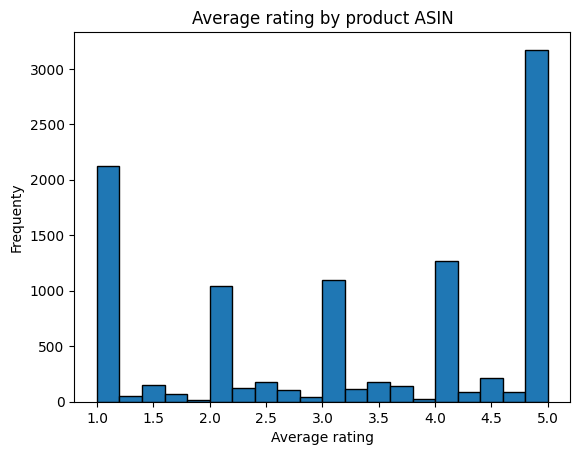

In [52]:
# Get the product ASINs and average ratings
# product_asins = list(average_ratings.keys())
# average_ratings = list(average_ratings.values())

# Create a line chart
plt.hist(average_ratings, bins=20, edgecolor='black')

# Add a title and labels
plt.title("Average rating by product ASIN")
plt.xlabel("Average rating")
plt.ylabel("Frequenty")

# Show the plot
plt.show()

In [46]:
# Average score report
print('Average score for product warranty:', round(sum(average_ratings) / len(average_ratings), 2))

Average score for product warranty: 3.25


# Visualizing Word2Vec Word Embeddings using t-SNE

In [87]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word):

    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.most_similar(word)

    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2,perplexity=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

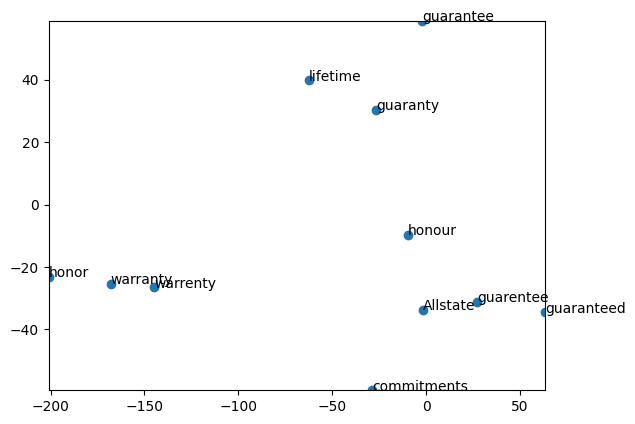

In [91]:
display_closestwords_tsnescatterplot(model, 'guarantee')

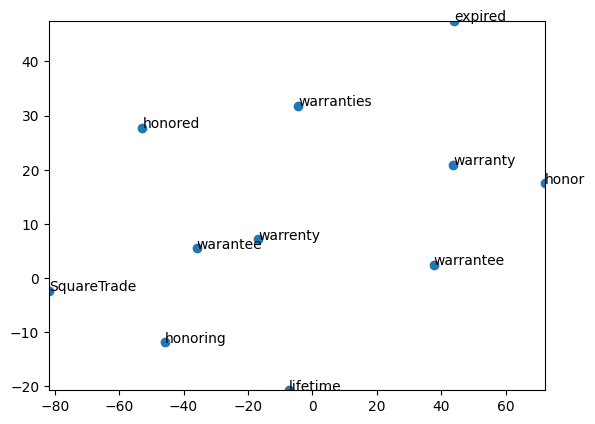

In [92]:
display_closestwords_tsnescatterplot(model, 'warranty')